In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt


import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.corpus import stopwords


In [2]:
df = pd.read_csv(r'C:\Users\Name\Documents\Python Notebook\amazon_bestseller.csv', sep = ',')

In [74]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [75]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [77]:
df['User Rating'].describe()

count    550.000000
mean       4.618364
std        0.226980
min        3.300000
25%        4.500000
50%        4.700000
75%        4.800000
max        4.900000
Name: User Rating, dtype: float64

In [78]:
df['Reviews'].describe()

count      550.000000
mean     11953.281818
std      11731.132017
min         37.000000
25%       4058.000000
50%       8580.000000
75%      17253.250000
max      87841.000000
Name: Reviews, dtype: float64

In [79]:
df['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [80]:
def autolabel(rects, labels=None, height_factor=1.05):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

#reference for autolabel https://stackoverflow.com/questions/43443219/seaborn-workaround-for-hue-barplot

Text(0.5, 1.0, 'Distribution of Total Books by Genre per Year')

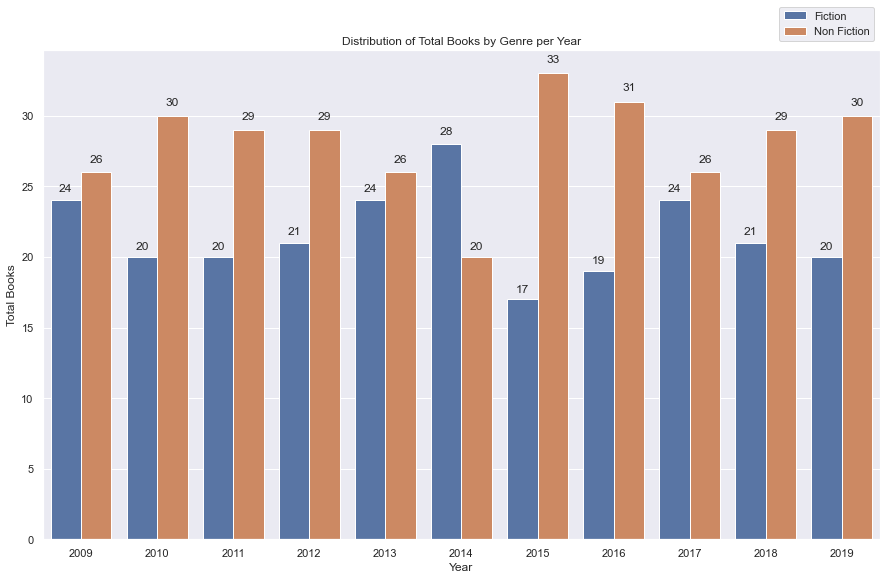

In [81]:
#distribution type books that goes hits by year (fiction / non fiction ) 
df_books = df.groupby(['Genre','Year']).agg({'Name':'nunique'}).reset_index()

ax = sns.barplot(x="Year", y="Name", hue='Genre', data=df_books)
sns.set(rc={'figure.figsize':(15,9)})
ax.set(xlabel='Year', ylabel='Total Books')

autolabel(ax.patches, labels= df_books.Name, height_factor=1.02)
ax.legend(loc=1, bbox_to_anchor=(1.0,1.1))

plt.title('Distribution of Total Books by Genre per Year') # Set the title



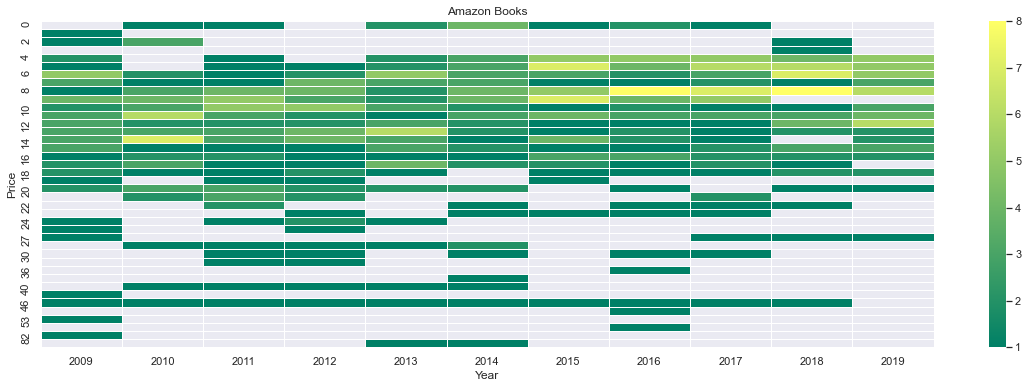

In [82]:
#heatmap price to total book per year
df_price = df.groupby(['Price','Year']).agg({'Name':'nunique'}).reset_index()


plt.figure(figsize=(20, 6)) # Set the size

amazon = df_price.pivot_table( # Pivot Table
    index='Price', # Index
    columns='Year', # Columns
    values='Name' # Value
)

sns.heatmap( # Let's make a heatmap
    amazon, # Data
    cmap='summer', # Color map
    linecolor='white', # Line color
    linewidth=1 # Line width
)

plt.title('Amazon Books') # Set the title
plt.show() # Show 

Text(0.5, 1.0, 'Distribution of Total Price by Genre per Year')

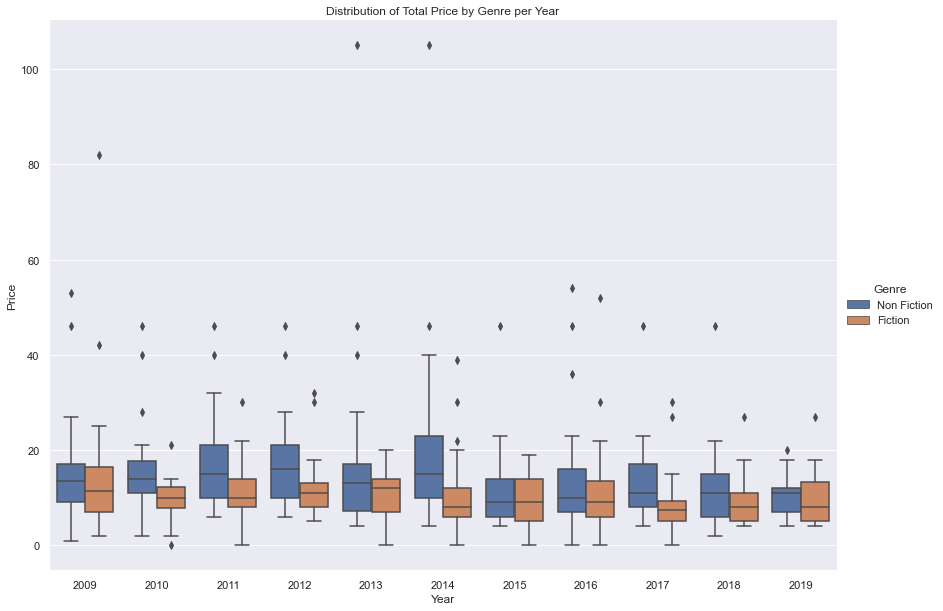

In [83]:
#avg. price along with the year box plot (fiction / non fiction)
ax = sns.catplot(x="Year", y="Price", hue="Genre", kind="box", height=8.27, aspect=11.7/8.27, data=df)

plt.title('Distribution of Total Price by Genre per Year') # Set the title


Text(0.5, 1.0, 'Median Plotline of Price by Genre per Year')

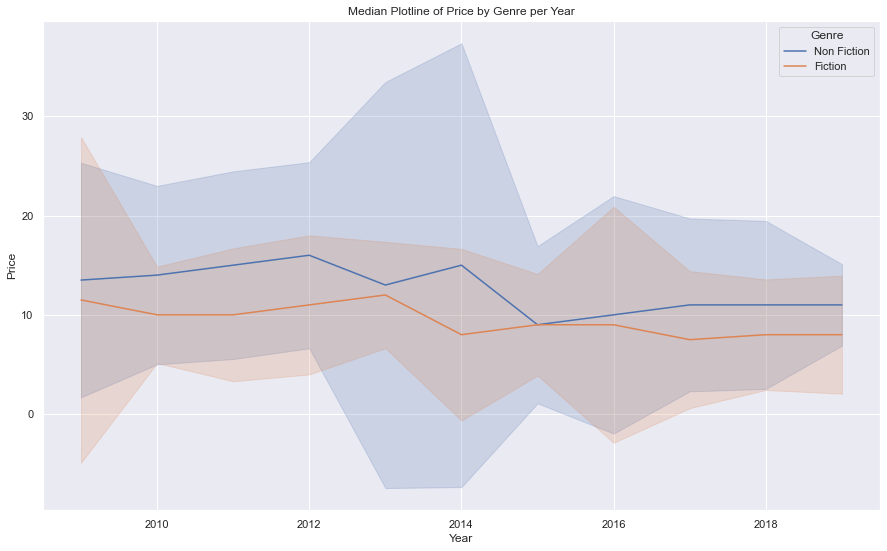

In [84]:
ax = sns.lineplot(x="Year", y="Price", hue="Genre", err_style="band", ci='sd', estimator=np.median, data=df)

plt.title('Median Plotline of Price by Genre per Year') # Set the title

Text(0.5, 1.0, 'Distribution of Total Rating by Genre per Year')

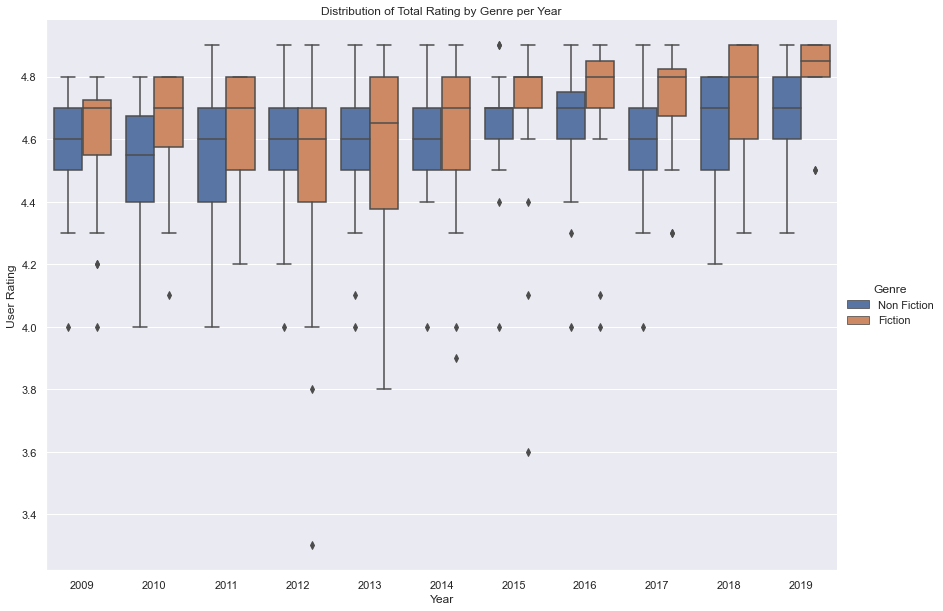

In [85]:
#avg. price along with the year box plot (fiction / non fiction)
ax = sns.catplot(x="Year", y="User Rating", hue="Genre", kind="box", height=8.27, aspect=11.7/8.27, data=df)

plt.title('Distribution of Total Rating by Genre per Year') # Set the title


Text(0.5, 1.0, 'Median Plotline of Rating by Genre per Year')

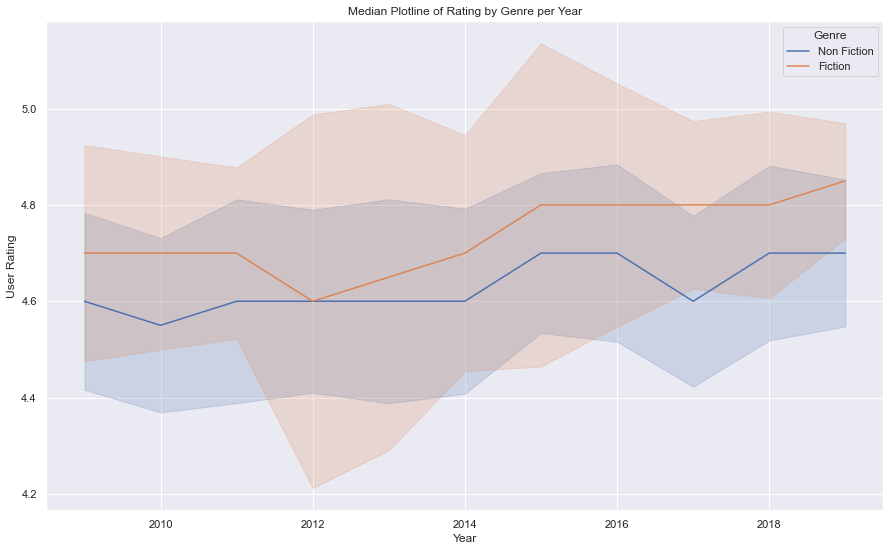

In [86]:
ax = sns.lineplot(x="Year", y="User Rating", hue="Genre", err_style="band", ci='sd', estimator=np.median, data=df)

plt.title('Median Plotline of Rating by Genre per Year') # Set the title

Text(0.5, 1.0, 'Distribution of Total Reviews by Genre per Year')

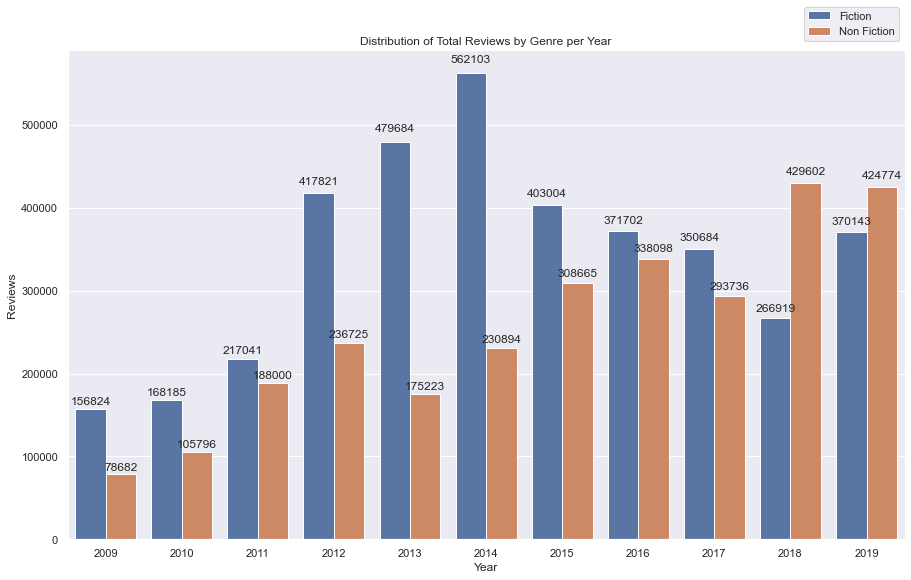

In [87]:
#total review along with the year (fiction / non fiction)

df_review = df.groupby(['Genre','Year']).agg({'Reviews':'sum'}).reset_index()

ax = sns.barplot(x="Year", y="Reviews", hue='Genre', data=df_review)
sns.set(rc={'figure.figsize':(15,9)})

autolabel(ax.patches, labels= df_review.Reviews, height_factor=1.02)
ax.legend(loc=1, bbox_to_anchor=(1.0,1.1))

plt.title('Distribution of Total Reviews by Genre per Year') # Set the title



In [88]:
#top 3 highest author with avg. rating
df_author_rating = df.groupby(['Author','Genre']).agg({'User Rating':'mean'}).reset_index()

df_author_rating['Rank'] = df_author_rating.groupby(['Genre'])['User Rating'].rank(method='dense', ascending=False)

Text(0.5, 1.0, 'Top 3 Dense Rank Author based on Rating on Fiction Genre')

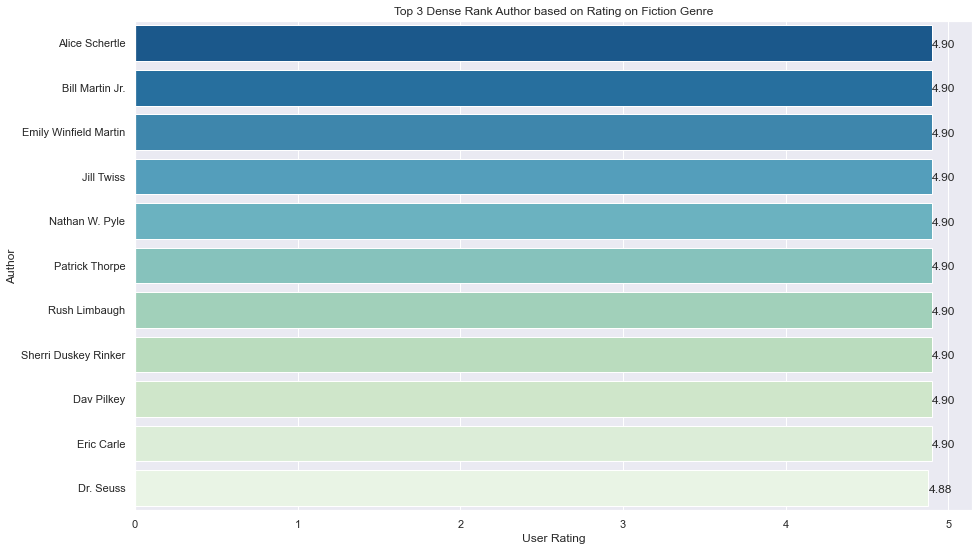

In [89]:
#fiction
df_author_rating_fiction = df_author_rating.loc[(df_author_rating['Rank'] <= 3) & (df_author_rating['Genre'] == 'Fiction')].sort_values('Rank', ascending=True)

ax = sns.barplot(y="Author",x="User Rating", data=df_author_rating_fiction, palette="GnBu_r")


initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:0.2f}".format(p.get_width()))
    initialx+=1
    
sns.set(rc={'figure.figsize':(8,7)})

plt.title('Top 3 Dense Rank Author based on Rating on Fiction Genre') # Set the title

Text(0.5, 1.0, 'Top 3 Dense Rank Author based on Rating on Non Fiction Genre')

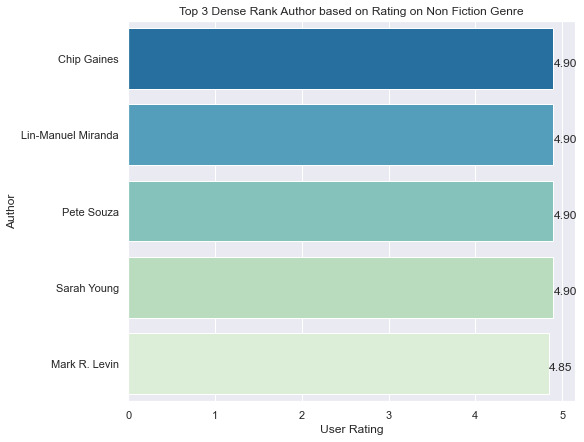

In [90]:
#non fiction
df_author_rating_non_fiction = df_author_rating.loc[(df_author_rating['Rank'] <= 3) & (df_author_rating['Genre'] == 'Non Fiction')].sort_values('Rank', ascending=True)

ax = sns.barplot(y="Author",x="User Rating", data=df_author_rating_non_fiction, palette="GnBu_r")

initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:0.2f}".format(p.get_width()))
    initialx+=1
    
sns.set(rc={'figure.figsize':(7,7)})

plt.title('Top 3 Dense Rank Author based on Rating on Non Fiction Genre') # Set the title

In [91]:
#top 5 author with highest review- fiction/non fiction
df_author_review = df.groupby(['Author','Genre']).agg({'Reviews':'sum'}).reset_index()

df_author_review['Rank'] = df_author_review.groupby(['Genre'])['Reviews'].rank(method='dense', ascending=False)

Text(0.5, 1.0, 'Top 3 Dense Rank Author based on Total Review on Fiction Genre')

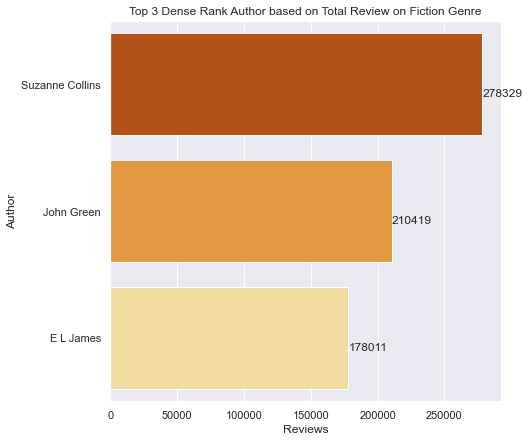

In [92]:
#fiction
df_author_review_fiction = df_author_review.loc[(df_author_review['Rank'] <= 3) & (df_author_review['Genre'] == 'Fiction')].sort_values('Reviews', ascending=False)

ax = sns.barplot(y="Author",x="Reviews", data=df_author_review_fiction, palette="YlOrBr_r")

initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:1.0f}".format(p.get_width()))
    initialx+=1
    
sns.set(rc={'figure.figsize':(6,5)})

plt.title('Top 3 Dense Rank Author based on Total Review on Fiction Genre') # Set the title

Text(0.5, 1.0, 'Top 3 Dense Rank Author based on Total Review on Non Fiction Genre')

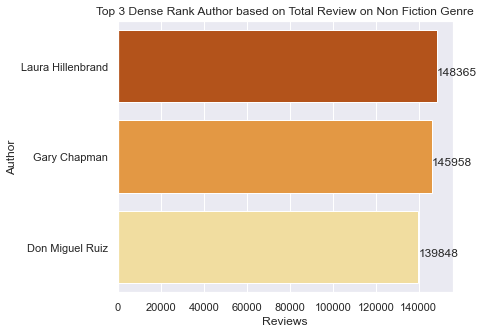

In [93]:
#non fiction
df_author_review_non_fiction = df_author_review.loc[(df_author_review['Rank'] <= 3) & (df_author_review['Genre'] == 'Non Fiction')].sort_values('Reviews', ascending=False)

ax = sns.barplot(y="Author",x="Reviews", data=df_author_review_non_fiction, palette="YlOrBr_r")

initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:1.0f}".format(p.get_width()))
    initialx+=1
    
sns.set(rc={'figure.figsize':(6,5)})

plt.title('Top 3 Dense Rank Author based on Total Review on Non Fiction Genre') # Set the title

In [94]:
#top 5 highest review book- fiction/non fiction
df_book_review = df.groupby(['Name', 'Genre']).agg({'Reviews':'sum'}).reset_index()

df_book_review['Rank'] = df_book_review.groupby(['Genre'])['Reviews'].rank(method='dense', ascending=False)

Text(0.5, 1.0, 'Top 5 Dense Rank Book based on Total Review on Fiction Genre')

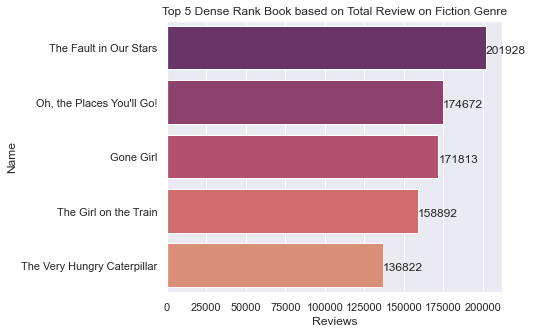

In [95]:
#fiction
df_book_review_fiction = df_book_review.loc[(df_book_review['Rank'] <= 5) & (df_book_review['Genre'] == 'Fiction')].sort_values('Reviews', ascending=False)

ax = sns.barplot(y="Name",x="Reviews", data=df_book_review_fiction, palette="flare_r")

initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:1.0f}".format(p.get_width()))
    initialx+=1
    
sns.set(rc={'figure.figsize':(6,5)})

plt.title('Top 5 Dense Rank Book based on Total Review on Fiction Genre') # Set the title

Text(0.5, 1.0, 'Top 5 Dense Rank Book based on Total Review on Non Fiction Genre')

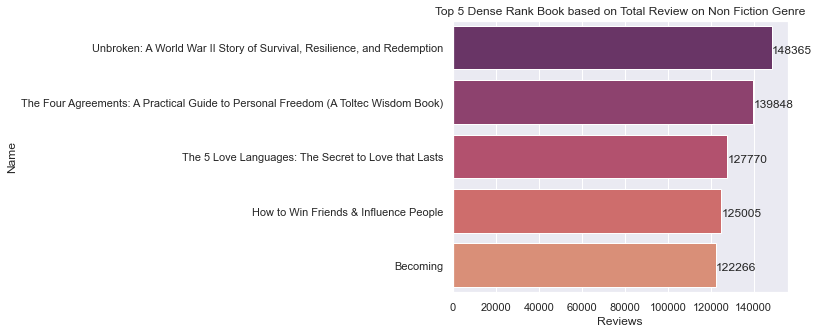

In [133]:
#non fiction
df_book_review_non_fiction = df_book_review.loc[(df_book_review['Rank'] <= 5) & (df_book_review['Genre'] == 'Non Fiction')].sort_values('Reviews', ascending=False)

ax = sns.barplot(y="Name",x="Reviews", data=df_book_review_non_fiction, palette="flare_r")

initialx=0
for p in ax.patches:
    ax.text(p.get_width(),initialx+p.get_height()/8,"{:1.0f}".format(p.get_width()))
    initialx+=1
    
sns.set(rc={'figure.figsize':(6,5)})

plt.title('Top 5 Dense Rank Book based on Total Review on Non Fiction Genre') # Set the title

Wordcloud

In [4]:
#word cloud book name
df['Name'] = df['Name'].str.strip().str.lower().str.replace('[^A-Za-z0-9]+',' ', regex=True)

In [5]:
newStopwords = stopwords.words('english')

In [6]:
df['new_name'] = df['Name'].apply(lambda x: ' '.join([word for word in x.split() if word not in (newStopwords)]))

In [7]:
def remDeps(s):
    return {" ".join(sorted(key.split(" "))):s[key] for key in s}

In [15]:
ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), min_df=3)

# X matrix where the row represents sentences and column is our one-hot vector for each token in our vocabulary
X = ngram_vectorizer.fit_transform(df['new_name'])

# Vocabulary
vocab = list(ngram_vectorizer.get_feature_names())

# Column-wise sum of the X matrix.
# It's some crazy numpy syntax that looks horribly unpythonic
# For details, see http://stackoverflow.com/questions/3337301/numpy-matrix-to-array
# and http://stackoverflow.com/questions/13567345/how-to-calculate-the-sum-of-all-columns-of-a-2d-numpy-array-efficiently
counts = X.sum(axis=0).A1
freq_distribution = Counter(dict(zip(vocab, counts)))


##for i in freq_distribution.most_common(20):
##    print(i)

# Counter to Data Frame (20 Most Common Words)
rslt = pd.DataFrame(freq_distribution.most_common(25),
                  columns=['Word', 'Frequency'])

rslt['Word'] = rslt['Word'].apply(lambda x: ' '.join(sorted(x.split(' '))))
rslt = rslt.groupby('Word').sum().reset_index()



print(rslt)

        Word  Frequency
0   american         16
1        art         13
2       book         76
3   coloring         20
4   cookbook         13
5        dog         15
6    edition         25
7      fifty         16
8       girl         14
9      guide         24
10     harry         13
11      kids         17
12   killing         13
13      life         24
14      love         32
15       man         19
16    manual         13
17     novel         23
18    people         13
19  personal         13
20    potter         13
21    secret         13
22    series         16
23    shades         16
24     world         14


In [16]:
tuples = tuple([tuple(x) for x in rslt.Word.value_counts().reset_index().values])

##https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
##https://stackoverflow.com/questions/39615520/pandas-create-word-cloud-from-a-column-with-strings

In [17]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(203,100%%, %50d%%)" % np.random.randint(70,80))

##pick color hsl https://hslpicker.com/#009dff

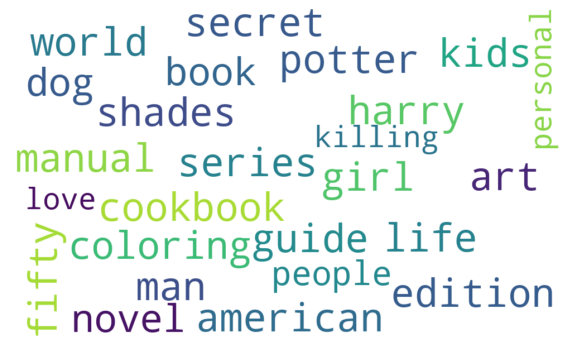

In [20]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=70, max_words=25, width=1000, height=600, background_color="white").generate_from_frequencies(dict(tuples))
#wordcloud.recolor(color_func = grey_color_func)
plt.figure(figsize=(10,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()